In [30]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
file_path = './data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [32]:
# Convert 'Order Date' to datetime format and set it as the index for time series analysis
# Each entry in the dataset has a date associated with it (the Order Date), indicating when the sale was recorded.
# By using the Order Date, we can track how sales change over time and build a model to predict future sales based on these historical patterns.
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
# see the order date
print(data.index)
data.head()

DatetimeIndex(['2017-08-11', '2017-08-11', '2017-12-06', '2016-11-10',
               '2016-11-10', '2015-09-06', '2015-09-06', '2015-09-06',
               '2015-09-06', '2015-09-06',
               ...
               '2018-03-27', '2015-05-21', '2015-05-21', '2015-05-21',
               '2015-05-21', '2017-05-21', '2016-12-01', '2016-12-01',
               '2016-12-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Order Date', length=9800, freq=None)


C:\Users\khale\AppData\Local\Temp\ipykernel_22444\1875453900.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-08-11,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-08-11,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-12-06,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-11-10,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-11-10,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
# Resample the data to monthly frequency and sum up the sales for each month
monthly_sales = data['Sales'].resample('M').sum()


In [34]:
# Fit an ARIMA model to the monthly sales data
model = ARIMA(monthly_sales, order=(1, 1, 1))  # (p,d,q) parameters can be tuned
arima_result = model.fit()


# Forecast for the next 12 months
forecast = arima_result.get_forecast(steps=12)
forecast_index = forecast.predicted_mean.index
forecast_values = forecast.predicted_mean

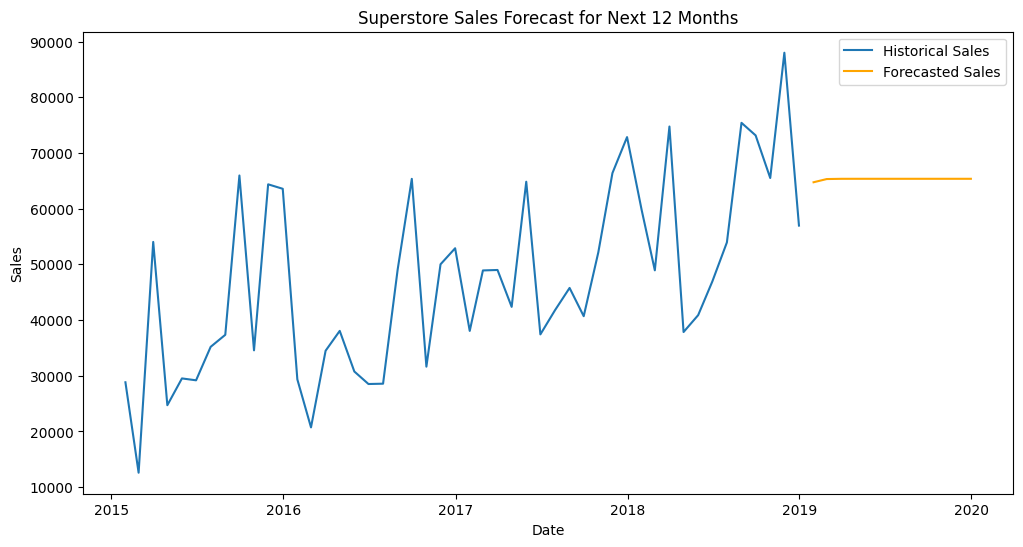

In [35]:
# Plot the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='orange')
plt.title('Superstore Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
